In [ ]:
!git clone https://github.com/FlyingGiraffe/vnn.git
%cd vnn


Cloning into 'vnn'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 92 (delta 30), reused 20 (delta 20), pack-reused 48 (from 1)
Receiving objects: 100% (92/92), 1.02 MiB | 23.26 MiB/s, done.
Resolving deltas: 100% (35/35), done.
/content/vnn


In [ ]:
%cd /content/vnn
!mkdir -p data
%cd data


/content/vnn
/content/vnn/data


In [ ]:
!wget --no-check-certificate https://web.archive.org/web/20211112014708/https://shapenet.cs.stanford.edu/media/modelnet40_normal_resampled.zip


--2026-02-01 17:04:11--  https://web.archive.org/web/20211112014708/https://shapenet.cs.stanford.edu/media/modelnet40_normal_resampled.zip
Resolving web.archive.org (web.archive.org)... 207.241.237.3
Connecting to web.archive.org (web.archive.org)|207.241.237.3|:443... connected.
HTTP request sent, awaiting response... ^C


In [ ]:
!unzip modelnet40_normal_resampled.zip


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: modelnet40_normal_resampled/sofa/sofa_0412.txt  
  inflating: modelnet40_normal_resampled/sofa/sofa_0473.txt  
  inflating: modelnet40_normal_resampled/sofa/sofa_0258.txt  
  inflating: modelnet40_normal_resampled/sofa/sofa_0663.txt  
  inflating: modelnet40_normal_resampled/sofa/sofa_0384.txt  
  inflating: modelnet40_normal_resampled/sofa/sofa_0362.txt  
  inflating: modelnet40_normal_resampled/sofa/sofa_0048.txt  
  inflating: modelnet40_normal_resampled/sofa/sofa_0344.txt  
  inflating: modelnet40_normal_resampled/sofa/sofa_0027.txt  
  inflating: modelnet40_normal_resampled/sofa/sofa_0288.txt  
  inflating: modelnet40_normal_resampled/sofa/sofa_0682.txt  
  inflating: modelnet40_normal_resampled/sofa/sofa_0432.txt  
  inflating: modelnet40_normal_resampled/sofa/sofa_0702.txt  
  inflating: modelnet40_normal_resampled/sofa/sofa_0083.txt  
  inflating: modelnet40_normal_resampled/sofa/sofa_024

In [ ]:
!ls
!ls modelnet40_normal_resampled


modelnet40_normal_resampled  modelnet40_normal_resampled.zip
airplane   cup		 lamp			     night_stand  table
bathtub    curtain	 laptop			     person	  tent
bed	   desk		 mantel			     piano	  toilet
bench	   door		 modelnet10_shape_names.txt  plant	  tv_stand
bookshelf  dresser	 modelnet10_test.txt	     radio	  vase
bottle	   filelist.txt  modelnet10_train.txt	     range_hood   wardrobe
bowl	   flower_pot	 modelnet40_shape_names.txt  sink	  xbox
car	   glass_box	 modelnet40_test.txt	     sofa
chair	   guitar	 modelnet40_train.txt	     stairs
cone	   keyboard	 monitor		     stool


In [ ]:
%cd /content/vnn


/content/vnn


In [ ]:
import torch
print(torch.cuda.is_available())


True


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import torch
print(torch.__version__)
print(torch.version.cuda)


2.9.0+cu126
12.6


In [ ]:
!pip install -vvv 'git+https://github.com/facebookresearch/pytorch3d.git'


Using pip 24.1.2 from /usr/local/lib/python3.12/dist-packages/pip (python 3.12)
Non-user install because site-packages writeable
Created temporary directory: /tmp/pip-build-tracker-3362cza4
Initialized build tracking at /tmp/pip-build-tracker-3362cza4
Created build tracker: /tmp/pip-build-tracker-3362cza4
Entered build tracker: /tmp/pip-build-tracker-3362cza4
Created temporary directory: /tmp/pip-install-to0en8ao
Created temporary directory: /tmp/pip-ephem-wheel-cache-i_rpm49p
  Created temporary directory: /tmp/pip-req-build-619cs20g
  Cloning https://github.com/facebookresearch/pytorch3d.git to /tmp/pip-req-build-619cs20g
  Running command git version
  git version 2.34.1
  Running command git clone --filter=blob:none --verbose --progress https://github.com/facebookresearch/pytorch3d.git /tmp/pip-req-build-619cs20g
  Cloning into '/tmp/pip-req-build-619cs20g'...
  POST git-upload-pack (175 bytes)
  POST git-upload-pack (gzip 1622 to 824 bytes)
  remote: Enumerating objects: 7987, don

In [ ]:
from pytorch3d.transforms import RotateAxisAngle
print("PyTorch3D installé correctement")


PyTorch3D installé correctement


In [ ]:
!python train_cls.py --model vn_pointnet_cls --rot aligned --log_dir /content/drive/MyDrive/vnn_logs/dgcnn_aligned


PARAMETER ...
Namespace(model='vn_pointnet_cls', batch_size=32, epoch=10, learning_rate=0.001, decay_rate=0.0001, optimizer='SGD', gpu='0', num_point=1024, log_dir='/content/drive/MyDrive/vnn_logs/dgcnn_aligned', normal=False, num_votes=3, rot='aligned', pooling='mean', n_knn=20)
Load dataset ...
The size of train data is 9843
The size of test data is 2468
No existing model, starting training from scratch...
Epoch 1 (1/10):
100% 308/308 [03:58<00:00,  1.29it/s]
Train Instance Accuracy: 0.112563
100% 78/78 [00:26<00:00,  3.00it/s]
Test Instance Accuracy: 0.114183, Class Accuracy: 0.070441
Best Instance Accuracy: 0.114183, Class Accuracy: 0.070441
Saving at /content/drive/MyDrive/vnn_logs/dgcnn_aligned/checkpoints/best_model.pth
Epoch 2 (2/10):
100% 308/308 [03:58<00:00,  1.29it/s]
Train Instance Accuracy: 0.145522
100% 78/78 [00:25<00:00,  3.01it/s]
Test Instance Accuracy: 0.135417, Class Accuracy: 0.083995
Best Instance Accuracy: 0.135417, Class Accuracy: 0.083995
Saving at /content/dr

In [ ]:
!python test_cls.py --model vn_pointnet_cls --log_dir /content/drive/MyDrive/vnn_logs/dgcnn_aligned


PARAMETER ...
Namespace(batch_size=16, model='vn_pointnet_cls', gpu='0', num_point=1024, log_dir='/content/drive/MyDrive/vnn_logs/dgcnn_aligned', normal=False, num_votes=3, rot='aligned', pooling='mean', n_knn=20)
Load dataset ...
The size of test data is 2468
Checkpoint keys: dict_keys(['epoch', 'instance_acc', 'class_acc', 'model_state_dict', 'optimizer_state_dict'])
100% 155/155 [01:06<00:00,  2.32it/s]
Test Instance Accuracy: 0.230645, Class Accuracy: 0.172182


Load dataset ...
The size of test data is 2468
The size of test data is 2468
Loading checkpoint from: /content/drive/MyDrive/vnn_logs/dgcnn_aligned/checkpoints/best_model.pth
Classifier and testDataLoader are now defined and ready.


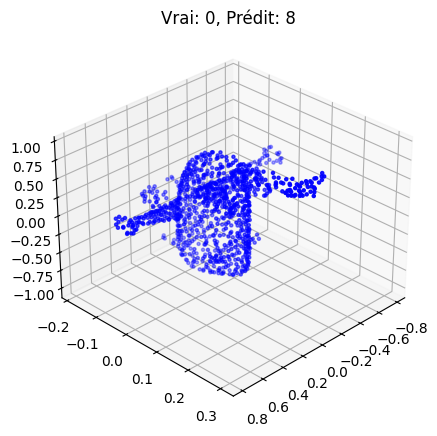

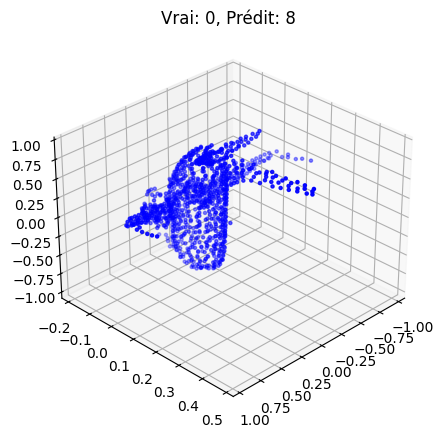

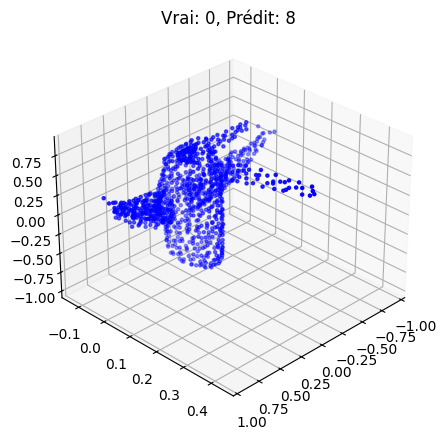

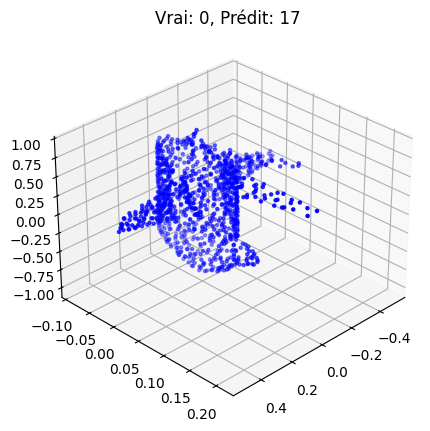

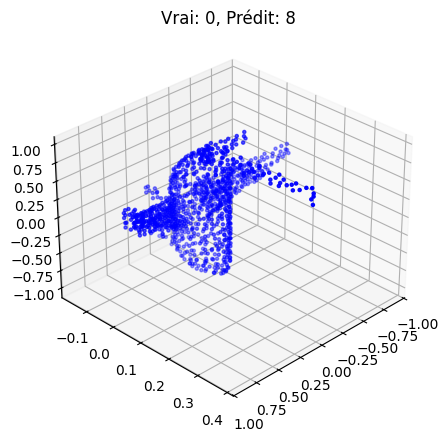

In [ ]:
import matplotlib.pyplot as plt
import torch
import torch.utils.data as data
import numpy as np
import os
import sys
from mpl_toolkits.mplot3d import Axes3D # Explicitly import for 3D projection

# Add current directory to path to find data_utils and models
sys.path.append(os.getcwd())

# Import data_utils and model
from data_utils.ModelNetDataLoader import ModelNetDataLoader
from models.vn_pointnet_cls import get_model as get_vn_pointnet_model

# Define parameters based on previous training/testing configuration
batch_size = 16 # From test_cls.py output
num_point = 1024 # From train_cls.py/test_cls.py output
log_dir = '/content/drive/MyDrive/vnn_logs/dgcnn_aligned'

# Load dataset
print("Load dataset ...")
# Fix: Update the root path to point to the correct subdirectory where the data resides
TEST_DATASET = ModelNetDataLoader(root='./data/modelnet40_normal_resampled', npoint=num_point, split='test', normal_channel=False)
testDataLoader = torch.utils.data.DataLoader(TEST_DATASET, batch_size=batch_size, shuffle=False, num_workers=4)
print(f"The size of test data is {len(TEST_DATASET)}")

# Initialize and load the classifier
num_class = 40 # ModelNet40 has 40 classes

# Create a dummy args object as required by get_model
class Args:
    def __init__(self):
        self.gpu = '0'
        self.normal = False
        self.n_knn = 20 # Add the missing n_knn attribute
        self.pooling = 'mean' # Add the missing pooling attribute
args = Args()

classifier = get_vn_pointnet_model(args, num_class=num_class, normal_channel=False).cuda()

checkpoint_path = os.path.join(log_dir, 'checkpoints', 'best_model.pth')
print(f"Loading checkpoint from: {checkpoint_path}")
checkpoint = torch.load(checkpoint_path, weights_only=False)
classifier.load_state_dict(checkpoint['model_state_dict'])
classifier.eval() # Set to evaluation mode
print("Classifier and testDataLoader are now defined and ready.")

# Sélection de quelques exemples du test set
examples_to_show = 5  # nombre d'exemples à visualiser
test_iter = iter(testDataLoader)

for i in range(examples_to_show):
    points, target = next(test_iter)  # batch
    points = points.transpose(2, 1).cuda()  # (B, 3, N)
    target = target[:, 0].cuda()

    # Classifier is already in eval mode and on GPU, no need to re-set in loop
    with torch.no_grad():
        pred, _ = classifier(points)
        pred_choice = pred.data.max(1)[1]

    points_np = points[0].cpu().numpy().T  # (N, 3)
    true_label = target[0].item()
    pred_label = pred_choice[0].item()

    # Affichage
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points_np[:,0], points_np[:,1], points_np[:,2], c='b', s=5)
    ax.set_title(f"Vrai: {true_label}, Prédit: {pred_label}")
    ax.view_init(elev=30, azim=45)
    plt.show()


Loaded label names from /content/vnn/data/modelnet40_normal_resampled/modelnet40_shape_names.txt
Classifier trouvé en mémoire.
Figure saved to: /content/drive/MyDrive/vnn_visualizations/predictions_grid.png


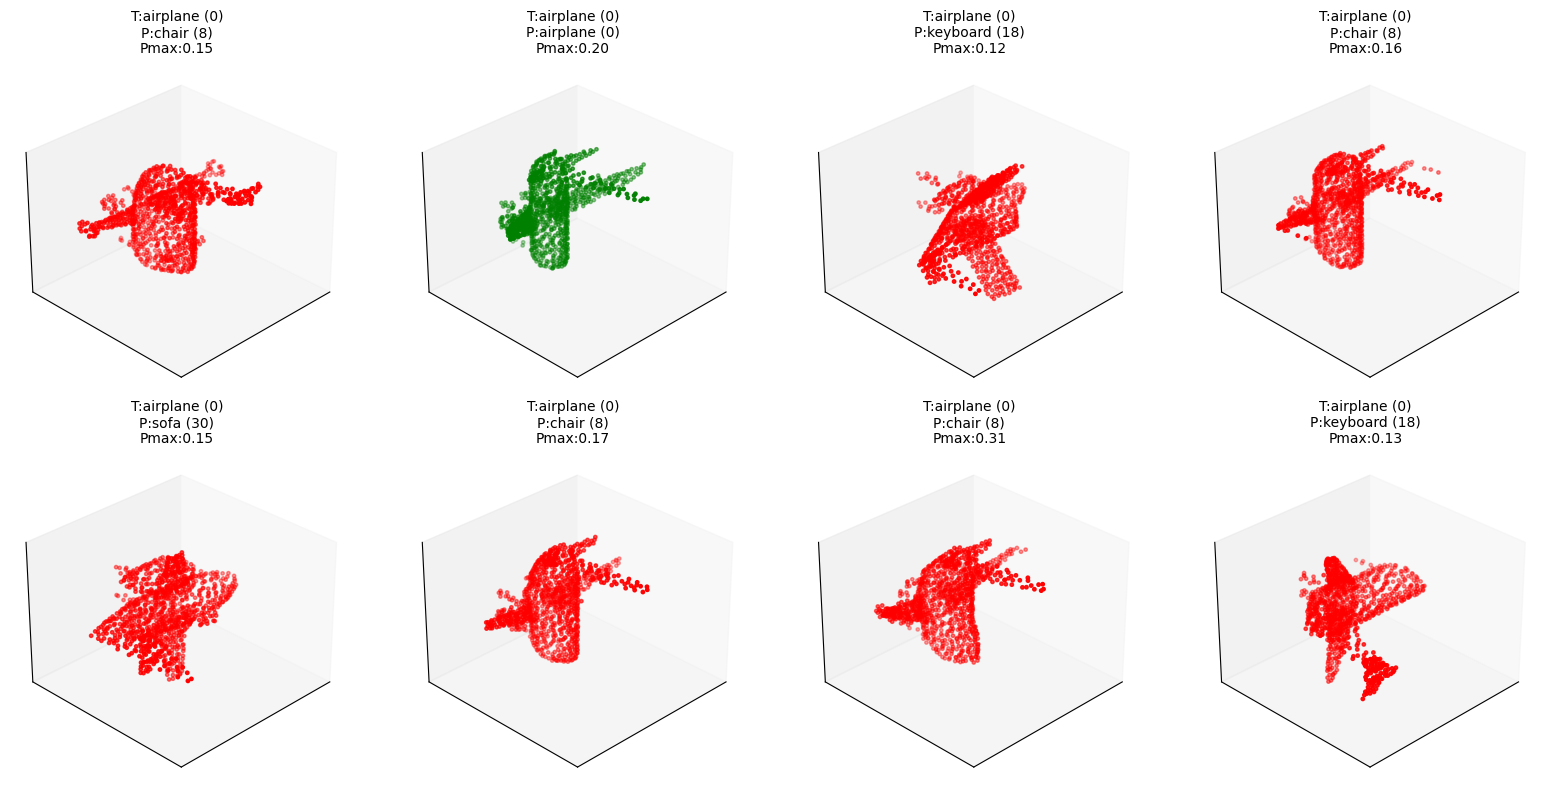

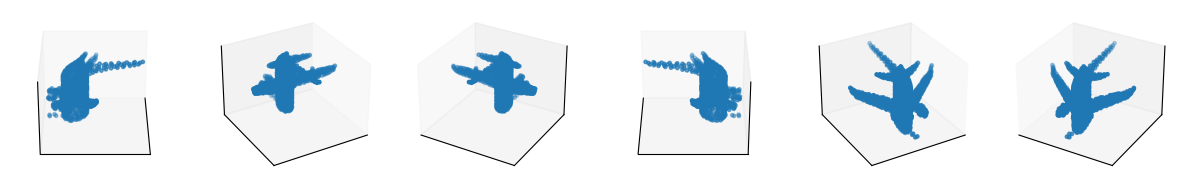

In [ ]:
# Visualisation des prédictions — coller dans Colab
import os
import math
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# --- Configuration utilisateur ---
LOG_DIR = "/content/drive/MyDrive/vnn_logs/dgcnn_aligned"  # chemin où se trouve checkpoints/best_model.pth
N_EXAMPLES = 8       # nombre d'exemples à afficher
COLS = 4             # colonnes de la grille d'affichage
POINT_SIZE = 6       # taille des points dans le scatter
SAVE_DIR = "/content/drive/MyDrive/vnn_visualizations"  # où sauvegarder les images
os.makedirs(SAVE_DIR, exist_ok=True)
# -----------------------------------

# --- helper : charger noms de classes ModelNet40 (si présent) ---
def load_label_names():
    candidates = [
        "/content/vnn/data/modelnet40_normal_resampled/modelnet40_shape_names.txt",
        "/content/vnn/data/modelnet40_normal_resampled/modelnet40_shape_names.txt".replace("vnn/data","data"),
        "/content/drive/MyDrive/vnn_logs/modelnet40_shape_names.txt",
        "/content/vnn/data/modelnet40_shape_names.txt",
    ]
    for p in candidates:
        if os.path.exists(p):
            with open(p, "r") as f:
                names = [l.strip() for l in f.readlines() if l.strip()]
            print("Loaded label names from", p)
            return names
    # fallback: numeric labels
    print("Label names file not found, using numeric labels.")
    return [str(i) for i in range(40)]

label_names = load_label_names()

# --- Charger checkpoint si classifier n'existe pas ---
try:
    classifier  # si déjà défini dans l'environnement
    print("Classifier trouvé en mémoire.")
except NameError:
    # crée le modèle et le charge si nécessaire
    print("Chargement du modèle depuis checkpoint...")
    import importlib
    # tu peux adapter le module suivant si tu utilises vn_dgcnn_cls etc.
    model_name = "vn_pointnet_cls"  # adapte si nécessaire
    MODEL = importlib.import_module(model_name)
    args = type("A", (), {"gpu":"0", "normal":False})()  # objet minimal si requis par get_model
    classifier = MODEL.get_model(args, 40, normal_channel=False).cuda()
    ckpt = torch.load(os.path.join(LOG_DIR, "checkpoints", "best_model.pth"), weights_only=False)
    classifier.load_state_dict(ckpt["model_state_dict"])
    classifier.eval()
    print("Checkpoint chargé.")

# --- Vérification du testDataLoader ---
try:
    testDataLoader
except NameError:
    raise RuntimeError("Le DataLoader 'testDataLoader' n'existe pas dans la session. Charge le dataset comme dans test_cls.py avant d'exécuter ce bloc.")

# --- Collecte d'exemples et prédictions ---
examples = []
labels_true = []
labels_pred = []
probs_pred = []

it = iter(testDataLoader)
collected = 0
with torch.no_grad():
    while collected < N_EXAMPLES:
        try:
            points_batch, target_batch = next(it)
        except StopIteration:
            break
        # points_batch : (B, N, 3) ou (B, 3, N) suivant l'implémentation
        B = points_batch.shape[0]
        for i in range(B):
            if collected >= N_EXAMPLES:
                break
            pts = points_batch[i]
            # remettre en forme pour le modèle : (B, 3, N)
            if pts.ndim == 2 and pts.shape[1] == 3:
                pts_for_model = pts.transpose(0,1).unsqueeze(0)  # (1, 3, N)
            elif pts.ndim == 2 and pts.shape[0] == 3:
                pts_for_model = pts.unsqueeze(0)
            else:
                # fallback try
                pts_for_model = pts.transpose(0,1).unsqueeze(0)
            pts_cuda = pts_for_model.cuda().float()
            out, _ = classifier(pts_cuda)  # out shape (1, num_class)
            prob = torch.softmax(out, dim=1).cpu().numpy()[0]
            pred_idx = int(out.data.max(1)[1].cpu().item())
            true_idx = int(target_batch[i,0].item()) if target_batch.ndim>1 else int(target_batch[i].item())
            # points for plotting (N,3)
            if pts.ndim == 2 and pts.shape[1] == 3:
                pts_np = pts.cpu().numpy()
            else:
                pts_np = pts.transpose(0,1).cpu().numpy()
            examples.append(pts_np)
            labels_true.append(true_idx)
            labels_pred.append(pred_idx)
            probs_pred.append(prob)
            collected += 1

if len(examples) == 0:
    raise RuntimeError("Aucun exemple collecté depuis testDataLoader (vérifie batch_size et loader)")

# --- Affichage en grille (matplotlib 3D) ---
rows = math.ceil(N_EXAMPLES / COLS)
fig = plt.figure(figsize=(4*COLS, 4*rows))
for idx, pts in enumerate(examples):
    ax = fig.add_subplot(rows, COLS, idx+1, projection='3d')
    color = 'g' if labels_true[idx] == labels_pred[idx] else 'r'
    ax.scatter(pts[:,0], pts[:,1], pts[:,2], s=POINT_SIZE, c=color, depthshade=True)
    title = f"T:{label_names[labels_true[idx]]} ({labels_true[idx]})\nP:{label_names[labels_pred[idx]]} ({labels_pred[idx]})\nPmax:{probs_pred[idx].max():.2f}"
    ax.set_title(title, fontsize=10)
    ax.set_xticks([]); ax.set_yticks([]); ax.set_zticks([])
    ax.view_init(elev=30, azim=45)
plt.tight_layout()
out_path = os.path.join(SAVE_DIR, "predictions_grid.png")
plt.savefig(out_path, dpi=200)
print("Figure saved to:", out_path)
plt.show()

# --- Option : afficher un exemple en plusieurs vues (si utile pour rapport) ---
def show_multiple_views(points_np, n_views=6, size=(15,6)):
    fig = plt.figure(figsize=size)
    for i in range(n_views):
        ax = fig.add_subplot(1, n_views, i+1, projection='3d')
        ax.scatter(points_np[:,0], points_np[:,1], points_np[:,2], s=POINT_SIZE)
        ax.view_init(elev=30, azim=60*i)
        ax.set_xticks([]); ax.set_yticks([]); ax.set_zticks([])
    plt.show()

# montrer le premier exemple en plusieurs vues
show_multiple_views(examples[1], n_views=6)


In [ ]:
import torch # Ensure torch is imported

# Get one batch of points to work with for rotation invariance test
# Assuming testDataLoader is available from previous cells like nkUTqDfVgubk
points, _ = next(iter(testDataLoader))
points = points[0].unsqueeze(0).transpose(2, 1).cuda() # Take first item from batch, make (1, 3, N)
print(f"Shape of input points for original pass: {points.shape}") # Debugging

global saved # Declare saved as global to ensure persistence across cells
saved = {} # Re-initialize saved for this specific test, ensuring it's fresh

def hook_fn(module, input, output):
    saved["feat"] = output.detach()
    print(f"Shape of feature captured by hook: {output.shape}") # Debugging

handle = classifier.feat.conv_pos.register_forward_hook(hook_fn)

# Forward pass for original points
classifier(points)
global feat_orig # Declare feat_orig as global to make it accessible later
feat_orig = saved["feat"].detach() # Capture original features explicitly
print(f"Shape of feat_orig (after assignment): {feat_orig.shape}") # Debugging

handle.remove()
# `saved["feat"]` now contains the original features, which are also stored in `feat_orig`.


Shape of input points for original pass: torch.Size([1, 3, 1024])
Shape of feature captured by hook: torch.Size([1, 21, 3, 1024, 20])
Shape of feat_orig (after assignment): torch.Size([1, 21, 3, 1024, 20])


In [ ]:
from pytorch3d.transforms import random_rotations
import plotly.graph_objects as go

R = random_rotations(1, device='cuda')[0]

# Fix: Change points @ R.T to R @ points to correctly apply rotation
# Use the 'points' variable defined in Ogj0Ef9foLcD
points_rot = (R @ points)
print(f"Shape of rotated points: {points_rot.shape}") # Debugging

# DO NOT re-initialize saved = {} here, as it would clear the `saved` dict and potentially affect `feat_orig` if not globally handled
# The hook_fn is already defined (globally from Ogj0Ef9foLcD) and will update the global saved dict
handle = classifier.feat.conv_pos.register_forward_hook(hook_fn) # Re-register the hook for this pass

classifier(points_rot);

global feat_rot # Declare feat_rot as global to make it accessible later
feat_rot = saved["feat"].detach() # Capture rotated features explicitly
print(f"Shape of feat_rot (after assignment): {feat_rot.shape}") # Debugging

handle.remove()


# Get one example points_np from `examples` list for interactive plot
# Assuming `examples` is populated from the `CypOK1xShh1Y` cell
if 'examples' in globals() and len(examples) > 0:
    example_points_np = examples[0]

    # Create a Plotly 3D scatter plot
    fig = go.Figure(data=[go.Scatter3d(
        x=example_points_np[:, 0],
        y=example_points_np[:, 1],
        z=example_points_np[:, 2],
        mode='markers',
        marker=dict(
            size=2,
            color=example_points_np[:, 2], # Color by Z-coordinate for better visualization
            colorscale='Viridis',
            opacity=0.8
        )
    )])

    # Update layout for better interactivity
    fig.update_layout(
        title='Interactive 3D Point Cloud (First Example)',
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z',
            aspectmode='data' # Keep aspect ratio fixed
        ),
        height=600,
        width=800
    )

    fig.show()
else:
    print("No examples available for interactive plotting. Please ensure the visualization cell runs first.")


Shape of rotated points: torch.Size([1, 3, 1024])
Shape of feature captured by hook: torch.Size([1, 21, 3, 1024, 20])
Shape of feat_rot (after assignment): torch.Size([1, 21, 3, 1024, 20])


DEBUG: Initial feat_orig tensor shape: torch.Size([1, 21, 3, 1024, 20])
DEBUG: Initial feat_rot tensor shape: torch.Size([1, 21, 3, 1024, 20])
Shape of R_np: (3, 3)
Shape of feat_orig_np: (1, 21, 3, 1024, 20)
Shape of feat_rot_np: (1, 21, 3, 1024, 20)
Shape of feat_expected: (1, 21, 3, 1024, 20)
Relative equivariance error: 0.0032065527


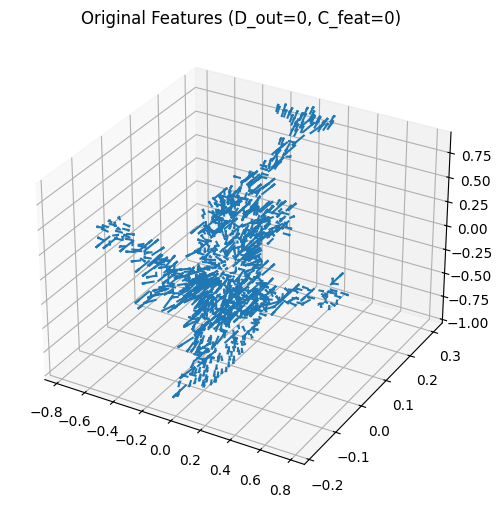

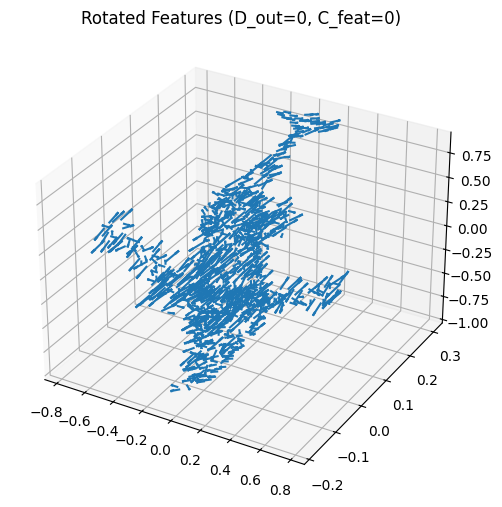

In [ ]:
import torch # Ensure torch is imported
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# global feat_orig, feat_rot, R, points (from previous cells)

print(f"DEBUG: Initial feat_orig tensor shape: {feat_orig.shape}")
print(f"DEBUG: Initial feat_rot tensor shape: {feat_rot.shape}")

# feat_orig and feat_rot are already (1, D_out, Vec_dim, N_points, C_features)

# Convert to numpy
feat_orig_np = feat_orig.cpu().numpy()
feat_rot_np = feat_rot.cpu().numpy()
R_np = R.cpu().numpy() # R is (3,3) from random_rotations

print(f"Shape of R_np: {R_np.shape}")
print(f"Shape of feat_orig_np: {feat_orig_np.shape}")
print(f"Shape of feat_rot_np: {feat_rot_np.shape}")

# Manual application of rotation
# feat_orig_np has shape (Batch, D_out, Vec_dim, N_points, C_features) -> (1, 21, 3, 1024, 20)
# R_np has shape (Vec_dim_in, Vec_dim_out) -> (3, 3)

# 1. Move the vector dimension (index 2) to the last position for batch matrix multiplication
# From (B, D_out, Vec_dim, N_points, C_features) to (B, D_out, N_points, C_features, Vec_dim)
feat_orig_permuted = np.transpose(feat_orig_np, (0, 1, 3, 4, 2))
# Shape is now (1, 21, 1024, 20, 3)

# 2. Apply the rotation matrix
# This performs (..., Vec_dim) @ (Vec_dim, Vec_dim)
feat_expected_permuted = feat_orig_permuted @ R_np.T # Note: R_np.T for right-multiplication
# Shape remains (1, 21, 1024, 20, 3)

# 3. Move the vector dimension back to its original position (index 2)
# From (B, D_out, N_points, C_features, Vec_dim) to (B, D_out, Vec_dim, N_points, C_features)
feat_expected = np.transpose(feat_expected_permuted, (0, 1, 4, 2, 3))
# Final shape is (1, 21, 3, 1024, 20)

print(f"Shape of feat_expected: {feat_expected.shape}")


# Calculate equivariance error
error = np.linalg.norm(feat_rot_np - feat_expected) / (np.linalg.norm(feat_expected) + 1e-8)
print("Relative equivariance error:", error)

# For visualization:
# P is global from Ogj0Ef9foLcD: points (tensor) was (1, 3, 1024).
P_quiver = points[0].cpu().numpy().T # (3, 1024) -> (1024, 3)

# V_quiver should be (N_points, 3)
# feat_orig_np is (Batch, D_out, Vec_dim, N_points, C_features) -> (1, 21, 3, 1024, 20)
# We need to select one Batch (b), one D_out (x) and one C_feature (c), then take the 3-vector across N_points.
# feat_orig_np[b_idx, x_idx, :, n_idx, c_idx] gives a (3,) vector
# To get (N_points, 3): feat_orig_np[b_idx, x_idx, :, :, c_feat_idx].T
b_idx = 0
d_out_idx = 0
c_feat_idx = 0
V_quiver = feat_orig_np[b_idx, d_out_idx, :, :, c_feat_idx].T # (3, 1024) -> (1024, 3)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.quiver(
    P_quiver[:,0], P_quiver[:,1], P_quiver[:,2],
    V_quiver[:,0], V_quiver[:,1], V_quiver[:,2],
    length=0.05, normalize=True
)
plt.title(f"Original Features (D_out={d_out_idx}, C_feat={c_feat_idx})")
plt.show()

# Visualize rotated features
V_rot_quiver = feat_rot_np[b_idx, d_out_idx, :, :, c_feat_idx].T
fig_rot = plt.figure(figsize=(6,6))
ax_rot = fig_rot.add_subplot(111, projection='3d')
ax_rot.quiver(
    P_quiver[:,0], P_quiver[:,1], P_quiver[:,2],
    V_rot_quiver[:,0], V_rot_quiver[:,1], V_rot_quiver[:,2],
    length=0.05, normalize=True
)
plt.title(f"Rotated Features (D_out={d_out_idx}, C_feat={c_feat_idx})")
plt.show()


DEBUG: Initial feat_orig tensor shape: torch.Size([1, 21, 3, 1024, 20])
DEBUG: Initial feat_rot tensor shape: torch.Size([1, 21, 3, 1024, 20])
DEBUG: feat_orig_sliced tensor shape: torch.Size([21, 3, 1024, 20])
DEBUG: feat_rot_sliced tensor shape: torch.Size([21, 3, 1024, 20])
Shape of R_np: (3, 3)
Shape of feat_orig_np: (21, 3, 1024, 20)
Shape of feat_rot_np: (21, 3, 1024, 20)
Shape of feat_expected: (21, 3, 1024, 20)
Relative equivariance error: 0.0026009888


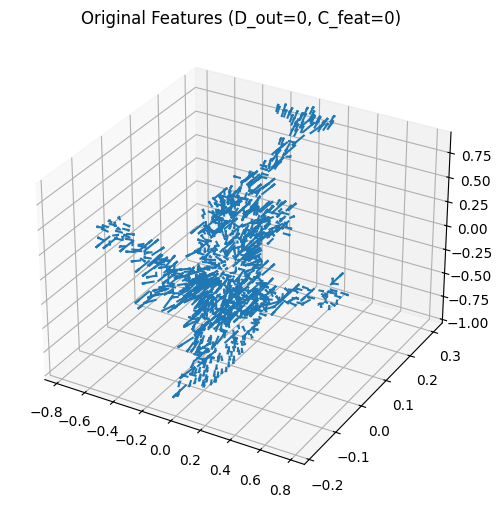

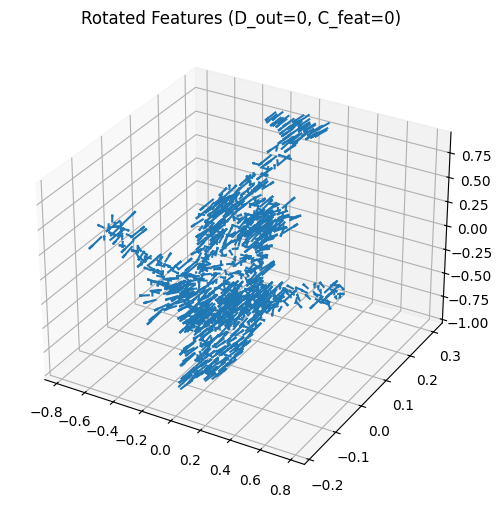

In [ ]:
import torch # Ensure torch is imported
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# global feat_orig, feat_rot, R, points (from previous cells)

print(f"DEBUG: Initial feat_orig tensor shape: {feat_orig.shape}")
print(f"DEBUG: Initial feat_rot tensor shape: {feat_rot.shape}")

# Remove batch dimension
# feat_orig is torch.Size([1, 21, 3, 1024, 20])
# So feat_orig_sliced should be torch.Size([21, 3, 1024, 20])
feat_orig_sliced = feat_orig[0]
feat_rot_sliced = feat_rot[0]

print(f"DEBUG: feat_orig_sliced tensor shape: {feat_orig_sliced.shape}")
print(f"DEBUG: feat_rot_sliced tensor shape: {feat_rot_sliced.shape}")

# Convert to numpy
feat_orig_np = feat_orig_sliced.cpu().numpy()
feat_rot_np = feat_rot_sliced.cpu().numpy()
R_np = R.cpu().numpy() # R is (3,3) from random_rotations

print(f"Shape of R_np: {R_np.shape}")
print(f"Shape of feat_orig_np: {feat_orig_np.shape}")
print(f"Shape of feat_rot_np: {feat_rot_np.shape}")

# Manual application of rotation instead of einsum due to persistent errors
# feat_orig_np has shape (D_out, Vec_dim, N_points, C_features) -> (21, 3, 1024, 20)
# R_np has shape (Vec_dim_in, Vec_dim_out) -> (3, 3)

# 1. Move the vector dimension (index 1) to the last position for batch matrix multiplication
# From (D_out, Vec_dim, N_points, C_features) to (D_out, N_points, C_features, Vec_dim)
feat_orig_permuted = np.transpose(feat_orig_np, (0, 2, 3, 1))
# Shape is now (21, 1024, 20, 3)

# 2. Apply the rotation matrix
# This performs (D_out * N_points * C_features, Vec_dim) @ (Vec_dim, Vec_dim)
# The multiplication automatically broadcasts over the leading dimensions
feat_expected_permuted = feat_orig_permuted @ R_np.T # Note: R_np.T for right-multiplication
# Shape remains (21, 1024, 20, 3)

# 3. Move the vector dimension back to its original position (index 1)
# From (D_out, N_points, C_features, Vec_dim) to (D_out, Vec_dim, N_points, C_features)
feat_expected = np.transpose(feat_expected_permuted, (0, 3, 1, 2))
# Final shape is (21, 3, 1024, 20)

print(f"Shape of feat_expected: {feat_expected.shape}")


# Calculate equivariance error
error = np.linalg.norm(feat_rot_np - feat_expected) / (np.linalg.norm(feat_expected) + 1e-8)
print("Relative equivariance error:", error)

# For visualization:
# P is global from Ogj0Ef9foLcD: points (tensor) was (1, 3, 1024).
P_quiver = points[0].cpu().numpy().T # (3, 1024) -> (1024, 3)

# V_quiver should be (N_points, 3)
# feat_orig_np is (D_out, Vec_dim, N_points, C_features) -> (21, 3, 1024, 20)
# We need to select one D_out (x) and one C_feature (c), then take the 3-vector across N_points.
# feat_orig_np[x_idx, :, n_idx, c_idx] gives a (3,) vector
# To get (N_points, 3): feat_orig_np[x_idx, :, :, c_feat_idx].T
d_out_idx = 0
c_feat_idx = 0
V_quiver = feat_orig_np[d_out_idx, :, :, c_feat_idx].T # (3, 1024) -> (1024, 3)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.quiver(
    P_quiver[:,0], P_quiver[:,1], P_quiver[:,2],
    V_quiver[:,0], V_quiver[:,1], V_quiver[:,2],
    length=0.05, normalize=True
)
plt.title(f"Original Features (D_out={d_out_idx}, C_feat={c_feat_idx})")
plt.show()

# Visualize rotated features
V_rot_quiver = feat_rot_np[d_out_idx, :, :, c_feat_idx].T
fig_rot = plt.figure(figsize=(6,6))
ax_rot = fig_rot.add_subplot(111, projection='3d')
ax_rot.quiver(
    P_quiver[:,0], P_quiver[:,1], P_quiver[:,2],
    V_rot_quiver[:,0], V_rot_quiver[:,1], V_rot_quiver[:,2],
    length=0.05, normalize=True
)
plt.title(f"Rotated Features (D_out={d_out_idx}, C_feat={c_feat_idx})")
plt.show()
